# Credit Risk Modelling

The focus of this project is on credit and risk modeling. We will use data from the peer-to-peer lending service, [Lending Club](https://www.lendingclub.com) to see if we can create a model that can accurately predict whether or not a borrower will pay off their loan on time in order to create a conservative personal investment plan. 

Each prospective borrower applies by providing financial history, the loans purpose, and other credit relevant data and Lending Club assigns an interest rate and grade to the loan or rejects the loan by using their own models. A loan with a higher interest rate with generate a higher return with a higher risk. Conversly, a loan with a lower interest will have lower risk and lower return. As conservative investors, we would like to create a model that can provide us with accurate and relevant predictions.


## Understanding the Data

Lending Club has loan data available on there [website](https://www.lendingclub.com/info/download-data.action), which requires the creation of an account to access. They have data available from 2007 to quarter 2, 2019. For the focus of our model we only want data about loans that have already either succesfully have been paid off or defaulted. Considering that the term of the loans are either 36 or 60 months, we will have to choose the data sets that are at least 5 years or older. For this reason we will only select data sets from 2007 to 2013 for the purposes of creating the model. We can use data from more recent years when actually implementing the model, at a later date. Let's begin by reading in the data.


In [1]:
# load in the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data from 2007 - 2011
loans_07 = pd.read_csv("LoanStats3a_securev1.csv", low_memory=False, header=1)

# data from 2012-2013
loans_12 = pd.read_csv("LoanStats3b_securev1.csv", low_memory=False, header=1)

In [2]:
# display number of rows and columns of each data set
print(loans_07.shape)
print(loans_12.shape)

(42538, 150)
(188183, 150)


## Combining data

Since these data sets share the same columns, we can merge them and clean the data as one as the data isn't too large.

In [3]:
# concat both data frames into one data frame `loans`
loans = pd.concat([loans_07, loans_12], axis=0).drop_duplicates().reset_index(drop=True)
print(loans.shape)

(230721, 150)


In [4]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loans.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
230716,1059224,NaN,35000.0,35000.0,35000.0,36 months,15.96%,1229.81,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
230717,1058722,NaN,12000.0,12000.0,12000.0,36 months,16.29%,423.61,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
230718,1058291,NaN,12000.0,7775.0,7775.0,60 months,15.27%,186.08,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
230719,Total amount funded in policy code 1: 2700702175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230720,Total amount funded in policy code 2: 81866225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loans.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

### Target column:

Using the [data dictionary](https://resources.lendingclub.com/LCDataDictionary.xlsx), we can define our target column as `loan_status` because it describes whether a loan was paid off on time, was delayed, or went into default. This column contains text values which we will need to convert to numeric ones.

In [7]:
print(loans['loan_status'].value_counts())

Fully Paid                                             192626
Charged Off                                             35341
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


Only the `Fully Paid` and `Charged Off` values describe the outcome fo the loan. The other categories describe loans that are still ongoing and thus will no add any value to our models or are in some new payment agreement, regardless there just aren't enough of these cases to warrant keeping them for our model. By using just the `Fully Paid` and `Charged Off` values we can turn this into a **binary classification** problem. We need to transform `Fully Paid`'s value into 1 for a positive case and `Charge Off` into 0 to represent a negative case. 

In [8]:
loans = loans[(loans['loan_status'] == 'Fully Paid') | (loans['loan_status'] == 'Charged Off')]

status_replace = {
    'loan_status' : {
        'Fully Paid' : 1,
        'Charged Off' : 0,
    }
}

loans = loans.replace(status_replace)


In [9]:
print(loans['loan_status'].value_counts())

1    192626
0     35341
Name: loan_status, dtype: int64


## Data Cleaning

The data has 230721 rows and a 150 columns with varying amounts of data types, this will need to be reduced somehow. The main focus of cleaning is for performance in our machine learning models. The [data dictionary](https://resources.lendingclub.com/LCDataDictionary.xlsx) can give us some insight on which columns to remove:

- non-contributing columns: columns where the information does not alter the ability of the borrower to pay back the loan like ID values for example
- data format: data formatted poorly will need to be cleaned up or some data may be too time intensive
- data redundancy: any data that repeats information found possibly in another column
- data leakage: data from the future that could disrupt our model, columns with data containing information about the loan after it has been funded like whether it has been paid off or not.

We will use data visualization for further analysis on whether a column will work in our model or not. After this we can again use data visualization to help remove any missing vales, create categorical data for columns, and find any correlations between our feature and target columns.

### Non-contributing columns & data format:

We will eliminate any non-contributing columns. Things like `id`, `member_id`, `url`, and `policy_code` will not add any value to our models and are randomely generated by Lending Club. We will also remove columns that may have data like `emp_title`, `desc`, `debt_settlement_flag`, `issue_d`, or `initial_list_status` that would require complex analysis to make useful and still would not likely benefit our models.

In [10]:
# remove non-contributing columns and columns with unacceptable data formats
loans = loans.drop(['id', 'member_id', 'emp_title', 'url', 'policy_code', 'desc', 'debt_settlement_flag', 
                    'issue_d', 'initial_list_status'], axis=1)

### Data redundancy:

The next step is to sort through redundant data. The `zip_code` column only contains 3 digits to protect the privacy of the borrowers, these 3 digits only give the state in which the borrower resides in making this column contain the same information as `addr_state`. Columns `grade` and `sub-grade` have data contained in `int_rate` so we will need to decide which one to use. We can graph the correlations differences for some insight. We will need to convert `int_rate` to numeric data and strip it's `%` sign.

In [11]:
# convert columns to numeric data
loans['int_rate'] = loans['int_rate'].str.rstrip('%').astype('float')

Let's look at the `int_rate` of each grade.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


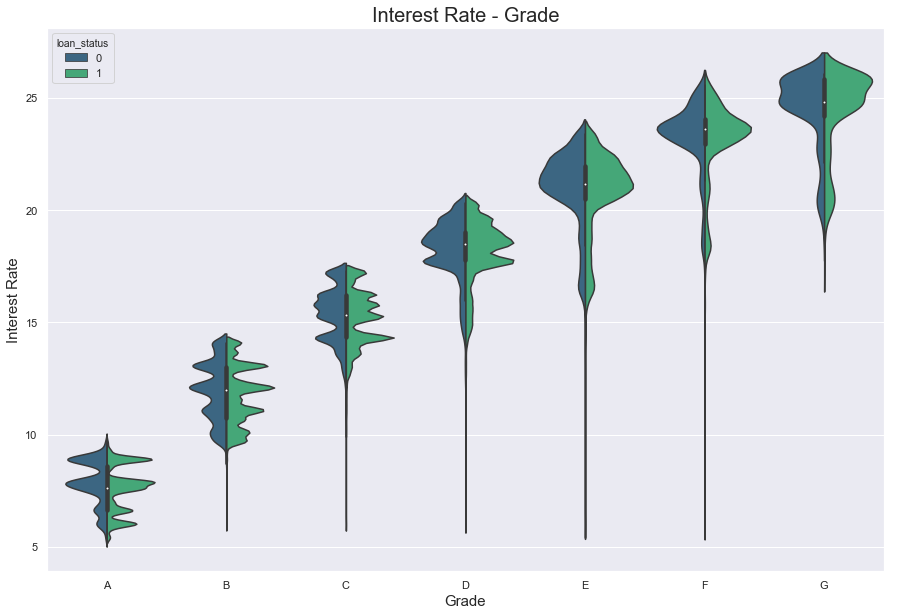

In [12]:
sns.set(rc={'figure.figsize':(15,10)})
sns.violinplot(x="grade", y="int_rate", data=loans, palette='viridis', order="ABCDEFG",hue='loan_status',split=True)
plt.title("Interest Rate - Grade", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15);

We see that `int_rate` contains the information in `grade` and thus `sub_grade` so we will drop those two columns and keep `int_rate` for our model.

In [13]:
# remove columns containing data redundancy
loans = loans.drop(['zip_code', 'grade', 'sub_grade'], axis=1)

### Data leakage:

We need to remove any columns that contain any information that could leak data to the prediction model. So columns: `funded_amnt`, `funded_amnt_inv`, `out_prncp`, `out_prncp_inv`, `total_pymnt`, `total_pymnt_inv`, `total_rec_prncp`, `total_rec_int`, `total_rec_late_fee`, `recoveries`, `collection_recovery_fee`, `last_pymnt_d`, and `last_pymnt_amnt` all give away information on whether the loan was succesfully paid off or not which would disrupt our model from correctly predicting that information correctly.

In [14]:
# remove columns that leak data from the future and disrupt our prediction models
loans = loans.drop([
    'funded_amnt', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
    'last_pymnt_d', 'last_pymnt_amnt'
                         ], axis=1)

### Unique values:

Let's remove any columns that contain only one unique value as they won't be useful for any of our machine learning models. Columns with only one unique value will not help our model make predictions.

In [15]:
# remove any columns that only contain one unique value and display
orig_columns = loans.columns
drop_columns = []
for col in orig_columns:
    col_series = loans[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
        
loans = loans.drop(drop_columns, axis=1)
print(drop_columns)

['pymnt_plan', 'application_type', 'hardship_flag', 'hardship_type', 'deferral_term', 'hardship_length']


## Feature Preperation

Our machine learning models will require the columns in the data to be numeric. Columns with missing values will also not work. We will go through our data and prepare so that it can succesfully go through our model.

### Null values:

Let's see which columns have null values.

In [16]:
# display columns with null values
null_counts = loans.isnull().sum()
print(null_counts[null_counts>0])

emp_length                                      8965
title                                             18
mths_since_last_delinq                        133300
mths_since_last_record                        207702
revol_util                                       175
next_pymnt_d                                  227967
last_credit_pull_d                                12
collections_12_mths_ex_med                        56
mths_since_last_major_derog                   195451
annual_inc_joint                              227967
dti_joint                                     227967
verification_status_joint                     227967
tot_coll_amt                                   67527
tot_cur_bal                                    67527
open_acc_6m                                   227967
open_act_il                                   227967
open_il_12m                                   227967
open_il_24m                                   227967
mths_since_rcnt_il                            

A lot of columns are missing data. Let's remove any column that is missing more than 50% of its data.

In [17]:
# remove any columns that contain 50% or more NaN values
pct_null = loans.isnull().sum() / len(loans)
missing_features = pct_null[pct_null > 0.50].index
loans.drop(missing_features, axis=1, inplace=True)

# display columns with remaining NaN values
null_counts = loans.isnull().sum()
print(null_counts[null_counts>0])

emp_length                     8965
title                            18
revol_util                      175
last_credit_pull_d               12
collections_12_mths_ex_med       56
tot_coll_amt                  67527
tot_cur_bal                   67527
total_rev_hi_lim              67527
acc_open_past_24mths          47281
avg_cur_bal                   67533
bc_open_to_buy                48811
bc_util                       48898
chargeoff_within_12_mths         56
mo_sin_old_il_acct            73658
mo_sin_old_rev_tl_op          67528
mo_sin_rcnt_rev_tl_op         67528
mo_sin_rcnt_tl                67527
mort_acc                      47281
mths_since_recent_bc          48614
mths_since_recent_inq         67654
num_accts_ever_120_pd         67527
num_actv_bc_tl                67527
num_actv_rev_tl               67527
num_bc_sats                   55841
num_bc_tl                     67527
num_il_tl                     67527
num_op_rev_tl                 67527
num_rev_accts               

Considering there are still many columns with relatively large amounts of missing data, we will drop any columns that are missing at least 15% of there data.

In [18]:
# remove any columns that contain 50% or more NaN values
pct_null = loans.isnull().sum() / len(loans)
missing_features = pct_null[pct_null > 0.15].index
loans.drop(missing_features, axis=1, inplace=True)

# display columns with remaining NaN values
null_counts = loans.isnull().sum()
print(null_counts[null_counts>0])

emp_length                    8965
title                           18
revol_util                     175
last_credit_pull_d              12
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64


The `emp_length` and `pub_rec_bankruptcies` variables still have a lot of null values, let's explore the data for these columns.

In [19]:
# display the number of unique values in `pub_rec_bankruptcies` column
print(loans.pub_rec_bankruptcies.value_counts(normalize=True, dropna=False))

 0.0    0.921445
 1.0    0.074081
NaN     0.003057
 2.0    0.001127
 3.0    0.000167
 4.0    0.000079
 5.0    0.000018
 6.0    0.000018
 7.0    0.000004
 8.0    0.000004
Name: pub_rec_bankruptcies, dtype: float64


Considering that around 92% of the values are unique, this column will not add any value to our predective models so we will drop this column. The `emp_length` is too important to our models to drop, so we will just remove the missing data from this column, along with any of the other missing data from the other columns since they aren't missing much data compared to the other columns we have removed.

In [20]:
# drop `pub_rec_bankruptcies` and any remaining Nan values in the remaining columns of the data set
loans = loans.drop('pub_rec_bankruptcies', axis=1)
loans = loans.dropna(axis=0)

In [21]:
# display columns with remaining NaN values
loans.isna().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
last_credit_pull_d            0
last_fico_range_high          0
last_fico_range_low           0
collections_12_mths_ex_med    0
acc_now_delinq                0
chargeoff_within_12_mths      0
delinq_amnt                   0
tax_liens                     0
dtype: i

We have removed or filled all missing values.

### Converting to numerical data:

We will now convert our object data into numeric values.

In [22]:
# display the different types of data in our remaing columns
print(loans.dtypes.value_counts())

float64    20
object     10
int64       1
dtype: int64


In [23]:
# display the data that are `object` types
object_columns_df = loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                     36 months
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        May-2019
Name: 0, dtype: object


According the [data dictionary](https://resources.lendingclub.com/LCDataDictionary.xlsx), a lot of these values can be translated into categorical values which we can run through our model:

- home_ownership: home ownership status, can only be 1 of 4 categorical values according to the data dictionary
- verification_status: indicates if income was verified by Lending Club
- emp_length: number of years the borrower was employed upon time of application
- term: number of payments on the loan, either 36 or 60
- addr_state: borrower's state of residence
- purpose: a category provided by the borrower for the loan request
- title: loan title provided the borrower

Let's verify through checking the amount of unique values in each of these columns.

In [24]:
# display the unique values of the categorical columns
unique_ct = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']

for c in unique_ct:
    print(loans[c].value_counts())

MORTGAGE    110366
RENT         91241
OWN          16961
OTHER          139
NONE            42
Name: home_ownership, dtype: int64
Verified           93725
Not Verified       74887
Source Verified    50137
Name: verification_status, dtype: int64
10+ years    70046
2 years      20518
3 years      18049
< 1 year     17767
5 years      17538
1 year       14653
4 years      14269
6 years      14135
7 years      12969
8 years      10429
9 years       8376
Name: emp_length, dtype: int64
 36 months    165239
 60 months     53510
Name: term, dtype: int64
CA    36458
NY    19237
TX    16748
FL    14938
NJ     8786
IL     8520
PA     7574
VA     6973
GA     6971
OH     6791
NC     5911
MA     5579
MD     5158
WA     5123
MI     4946
AZ     4863
CO     4576
MN     3716
CT     3531
MO     3481
NV     3091
OR     2864
AL     2648
WI     2642
LA     2595
SC     2471
IN     2212
KS     1984
TN     1948
KY     1935
OK     1889
UT     1696
AR     1579
HI     1240
NM     1130
NH     1027
WV     1013
RI  

In [25]:
# display the data in `title` and `purpose` columns
print(loans["title"].value_counts())
print(loans["purpose"].value_counts())

Debt consolidation                         22376
Debt Consolidation                         15055
Credit card refinancing                     7451
Consolidation                               5096
debt consolidation                          4430
Debt Consolidation Loan                     3654
Other                                       2309
Credit Card Consolidation                   2217
Personal Loan                               1998
consolidation                               1981
Home improvement                            1837
Consolidation Loan                          1711
Home Improvement                            1660
Credit Card Refinance                       1399
Credit Card Payoff                          1311
Consolidate                                 1195
Personal                                    1112
Business                                    1105
Loan                                         994
Major purchase                               756
Credit Card Loan    

The `last_credit_pull_d`, `addr_state`, `earliest_cr_line`, and `title` columns will not add much predictive power to our models or are overly complex so we will remove these columns.

In [26]:
# remove columns that will not contribute to the predictive models
loans = loans.drop(['last_credit_pull_d', 'addr_state', 'earliest_cr_line', 'title'], axis=1)

The `revol_util` column needs to be converted from an interest rate to a float.

In [27]:
# convert column to numeric data
loans['revol_util'] = loans['revol_util'].str.rstrip('%').astype('float')

The `emp_length`, `home_ownership`, `verification_status`, and `term` can be converted into categorical values which will be more effective in relation to our predictive power. We encode these columns as dummy variables in order to do this.

Let's graph the distrubtion of `emp_length` for issued loans to help categorize this variable.

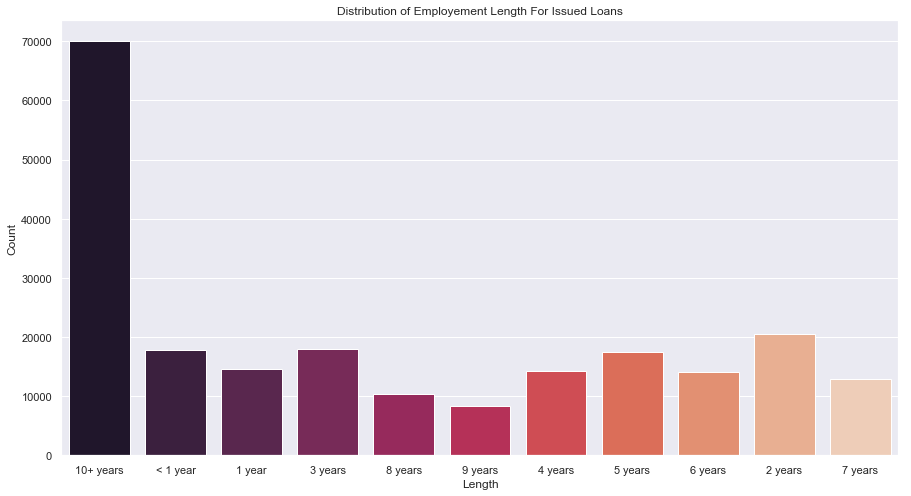

In [28]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(loans['emp_length'],palette='rocket')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()

We can safely say that the majority of loans issued from Lending Club are from borrowers employed 10+ years so we will convert `emp_length` into categorical float values.

In [29]:
# convert `emp_length` into categorical float values
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}

loans = loans.replace(mapping_dict)

In [30]:
# encode selected columns into dummy variables
cat_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(loans[cat_columns])
loans = pd.concat([loans, dummy_df], axis=1)
loans = loans.drop(cat_columns, axis=1)

In [31]:
loans.dtypes

loan_amnt                              float64
int_rate                               float64
installment                            float64
emp_length                               int64
annual_inc                             float64
loan_status                              int64
dti                                    float64
delinq_2yrs                            float64
fico_range_low                         float64
fico_range_high                        float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
last_fico_range_high                   float64
last_fico_range_low                    float64
collections_12_mths_ex_med             float64
acc_now_delinq                         float64
chargeoff_within_12_mths               float64
delinq_amnt  

In [32]:
loans.isna().sum()

loan_amnt                              0
int_rate                               0
installment                            0
emp_length                             0
annual_inc                             0
loan_status                            0
dti                                    0
delinq_2yrs                            0
fico_range_low                         0
fico_range_high                        0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
last_fico_range_high                   0
last_fico_range_low                    0
collections_12_mths_ex_med             0
acc_now_delinq                         0
chargeoff_within_12_mths               0
delinq_amnt                            0
tax_liens                              0
home_ownership_MORTGAGE                0
home_ownership_N

## Prediction Models

Our data shows a severe class imbalance, we have a ratio of 5.5 `Fully Paid` loans to every one `Charged Off` loans. This is generally good news as more loans are paid back then charged off. However, we want our model to be accurate so we will use a confusion matrix to help define our **error metric**. This diagram from and article from [towardsdatascience](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) gives a picture of predicted values and actual values categorized into true positives, true negatives, false positives, and false negatives.

![data1](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

We describe predicted values as positive and negative and actual values as true and false.

![data2](https://miro.medium.com/max/880/1*2lptVD05HarbzGKiZ44l5A.png)



#### False Postives

False positive rate is the number of false positives divided by the number of false positives plus the number of true negatives. This divides all the cases where we thought a loan would be paid off but it wasn't by all the loans that weren't paid off. We can use the formula:

`fpr = fp / (fp + tn)`

#### True Positives

True positive rate is the number of true positives divided by the number of true positives plus the number of false negatives. This divides all the cases where we thought a loan would be paid off and it was by all the loans that were paid off. We can use this formula:

`tpr = tp / (tp + fn)`


We will be using sklearn tools and pipelines including `predict_proba` which will give our prediction probabilites in an array form. In our particular binary classification problem, the `predict_proba` will give the probability of 0 and the probability of 1 which will correspond to `fpr` and `tpr` which we will graph.

Using the confusion matrix should ensure that our models are not overfitting or being thrown off by the class imbalance.


## Models

Let's instantiate our first models. In order to fit the machine learning models, we'll use the Scikit-learn library and pipelines to apply normalization or scaling procedures. We will run preliminary models with basic class balancing.

### Logistic regression:

We will split the model into training and testing data then scale the data and insantiate our model through a pipeline.

In [33]:
# split data into training and testing data

X = loans.drop('loan_status', axis=1)
y = loans['loan_status']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [34]:
# import sklearn tools
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# transform which scales between 1 and 0
sc = MinMaxScaler()
# instantiate model using a balance class weight
lr = LogisticRegression(class_weight='balanced', random_state=1)
# applies transformation on logistic regression model using a pipeline
pipe_lr = Pipeline([('scaler', sc), ('lr', lr)])

In [35]:
# train model using the the transformed insantiated logistic regression model
pipe_lr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('lr', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

### Evaluating logistic regression: AUROC 

To evaluate our model we will use the Area Under the Receiver Operating Characteristics or "AUROC" curve to check the performance of our model. The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis which represents probability. The AUC is the area underneath this curve. Higher AUC signifies that our model is better at predicting negative cases as negative cases(true negatives) and predicting positive cases as positive cases(true positives). 

No Skill ROC-AUC score: 0.50
Linear Regression ROC-AUC score: 0.89


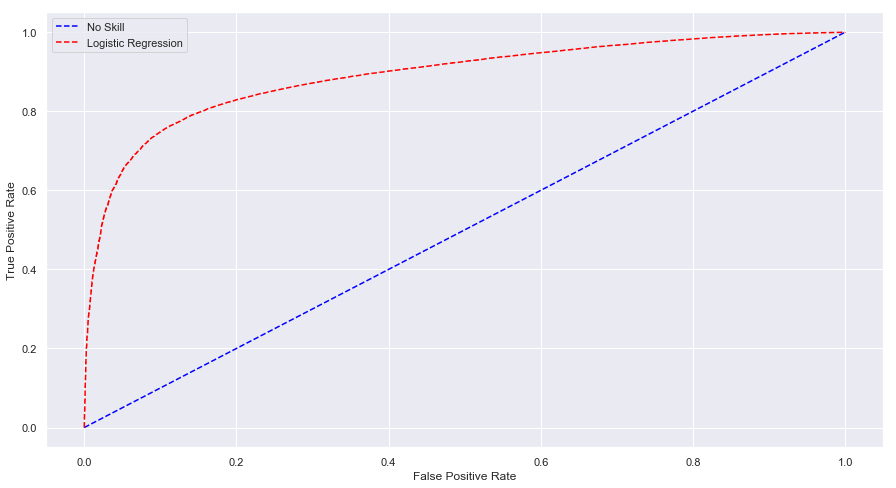

In [36]:
# predict probabilites and keeps only positive outcomes
test_probas_lr = pipe_lr.predict_proba(X_test)[:,1]

# import metric libraries
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# generate a no skill prediction
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, test_probas_lr)

print('No Skill ROC-AUC score: %.2f' % ns_auc)
print('Linear Regression ROC-AUC score: %.2f' % lr_auc)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, test_probas_lr)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill', color='blue')
plt.plot(lr_fpr, lr_tpr, linestyle='--', label="Logistic Regression", color='red')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# # calculate roc curve for false positive, true positive, and threshold rates
# fpr, tpr, tresholds = roc_curve(y_test, test_probas_lr)
# plt.plot(fpr, tpr, linestyle='--', label='')
# plt.title('ROC')
# plt.xlabel('FPR')
# plt.ylabel('TPR')

# print('Linear Regression ROC-AUC score: %.2f' % roc_auc_score(y_test, test_probas_lr))




Logistic regression seems to be pretty accurate with a ROC-AUC-score of around 89%. Let's try some other models.

### Random Forst Classifer

In [37]:
from sklearn.ensemble import RandomForestClassifier

#instantiate random forest classifier with a balanced class weight
rfc = RandomForestClassifier(class_weight='balanced', random_state=1)

pipe_rfc = Pipeline([('scaler', sc), ('rfc', rfc)])

In [38]:
# train model using the the transformed insantiated random forest model
pipe_rfc.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('rfc', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None...imators=10, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False))])

No Skill ROC-AUC score: 0.50
Linear Regression ROC-AUC score: 0.89
Random Forest Classifier ROC-AUC score: 0.86


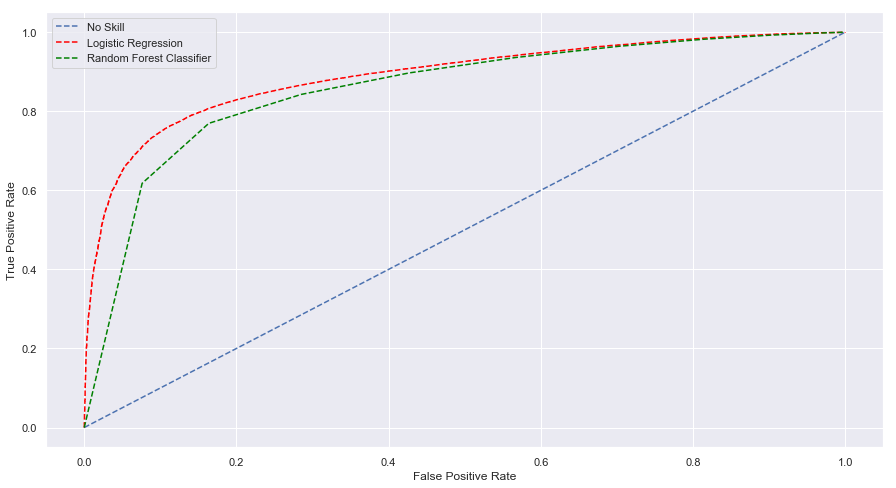

In [39]:
# predict probabilites and keep only positive outcomes
test_probas_rfc = pipe_rfc.predict_proba(X_test)[:,1]


# calculate scores
rfc_auc = roc_auc_score(y_test, test_probas_rfc)

print('No Skill ROC-AUC score: %.2f' % ns_auc)
print('Linear Regression ROC-AUC score: %.2f' % lr_auc)
print('Random Forest Classifier ROC-AUC score: %.2f' % rfc_auc)

# calculate roc curves
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, test_probas_rfc)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, linestyle='--', label="Logistic Regression", color='red')
plt.plot(rfc_fpr, rfc_tpr, linestyle='--', label="Random Forest Classifier", color='green')


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


# fpr, tpr, tresholds = roc_curve(y_test, test_probas_rfc)
# plt.plot(fpr, tpr)
# plt.title('ROC')
# plt.xlabel('FPR')
# plt.ylabel('TPR')

# print('Random Forest ROC-AUC score: %.2f' % roc_auc_score(y_test, test_probas_rfc))


Random forest classification scored less than logistic regression. Let's try one more model.

# Multinomial Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB

#instantiate multinomial naive bayes
nb = MultinomialNB()

pipe_nb = Pipeline([('scaler', sc), ('nb', nb)])

In [41]:
# train model using the the transformed insantiated naive bayes model
pipe_nb.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

No Skill ROC-AUC score: 0.50
Linear Regression ROC-AUC score: 0.89
Random Forest Classifier ROC-AUC score: 0.86
Multinomial Naive Bayes ROC-AUC score: 0.67


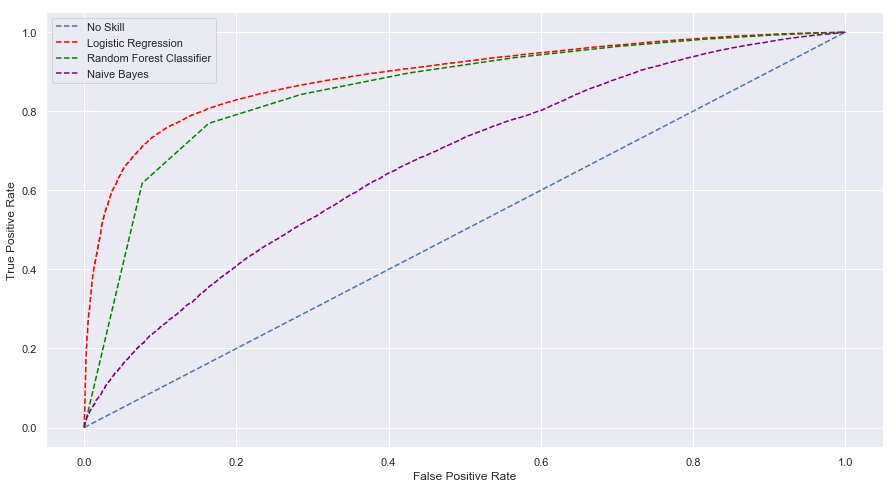

In [42]:
# predict probabilites and keep only positive outcomes
test_probas_nb = pipe_nb.predict_proba(X_test)[:,1]


# calculate scores
nb_auc = roc_auc_score(y_test, test_probas_nb)

print('No Skill ROC-AUC score: %.2f' % ns_auc)
print('Linear Regression ROC-AUC score: %.2f' % lr_auc)
print('Random Forest Classifier ROC-AUC score: %.2f' % rfc_auc)
print('Multinomial Naive Bayes ROC-AUC score: %.2f' % nb_auc)



# calculate roc curves
nb_fpr, nb_tpr, _ = roc_curve(y_test, test_probas_nb)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, linestyle='--', label="Logistic Regression", color='red')
plt.plot(rfc_fpr, rfc_tpr, linestyle='--', label="Random Forest Classifier", color='green')
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes', color='purple')


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

It seems multinomial naive bayes scored the lowest, most likely due to the class imbalance of `loan_status`.

# Conclusion

Preliminarly we are able to create prediction models with decent accuracy. We should focus on logistic regression and random forest classification considering they scored higher with little modification. For logistic regression we could try issuing a penalty to the data to further help with our class imbalance, implement different class balancer ratio's again to help with class balancing, and feature engineering to combine certain columns that were dropped. For random forest classification we could change the number of estimators, change the leaf structure, the number of jobs, and create more categorical variables from previously dropped columns. Naive-Bayes may be the wrong model for this problem, it could be that each variable does not have strong independence from one another, which makes sense considering that borrowers with higher incomes or longer employment lengths are more likely to recieve loans with lower interest rates. 

We could also do some operations to the input data as far as removing outliers, refiling missing values with mean for columns that potentially have more correlation with the target variable, and creating new features. Creating new features in particular could help reduce the sheer amount of data as well. We could also try and find more correlations through a detailed analysis of LC's company history and connect this with general market trends for low capitol personal investments.

The next steps are to refine the model, implement the model on current data, and create a preliminary investment plan. 